#  (1) 朴素贝叶斯 分类

scikit-learning网站的参考资料
https://scikit-learn.org/stable/modules/naive_bayes.html


基于贝叶斯定理与特征条件独立假设的分类方法。

模型：

- 高斯模型
- 多项式模型
- 伯努利模型

## (2) lab：根据天气判断是否出去踢足球

假设能否出去踢足球依赖于天气（类似于决策树，后面会讲到）。有如下历史数据

![天气](we.png)

能出去玩：yes（或1）

不能出去玩：no（或0）

——这实际上就是一个二分类。


根据历史数据，判断一下当天气为晴天（sunny）时，能不能出去玩？

因为晴天不是出去玩的唯一因素（比如温度太高，湿度太大）等，所以这是概率问题。

现在我们把这个问题转换为贝叶斯推理：

P(Yes|Sunny) = (P(Sunny|Yes) * P(Yes)) / P(Sunny)

=  P(Yes) * (P(Sunny|Yes) / P(Sunny)

P(Yes)为先验概率

(P(Sunny|Yes) / P(Sunny) 实际上就是一个系数（或抑制或放大先验概率），它与先验概率相乘，得到后验概率。

这里我们有，

P(Yes) = 9/14 = 0.64 （先验概率）

P(Sunny) = 5/14 = 0.36

P(Sunny|Yes) = 3/9 = 0.33



那么 P(Yes|Sunny)是多大呢？

P(Yes|Sunny) =0.64 * (0.33 / 0.36) = 0.60

相比于先验概率的0.64，现在后验概率为0.60(>0.5)，也就是说，看到天晴（sunny），我们能去玩的概率下降了。

我们也可以计算一下，另外一个类的概率：P(No|Sunny)。

P(No|Sunny) =  P(No) * (P(Sunny|No) / P(Sunny))

P(No) = 5/14 = 0.36 （先验概率）

P(Sunny|no) = 2/5 =0.4

P(Sunny) = 5/14 = 0.36

P(No|Sunny)  = 0.36 * (0.4/0.36)= 0.40 

不去玩的概率提升了。

但P(Yes|Sunny) > P(no|Sunny)

能出去的概率大，分类为Yes。

但历史告诉我们，sunny或许不是一个好选择。

Then that means most probably the game will be played when it is sunny.

# (3)利用Scikit-learn 实现预测（一个demo）

In [3]:
import numpy as np
#（1）导入模型
from sklearn.naive_bayes import GaussianNB
#（2）导入数据，数据太少，就不用分割了
X = np.array([[-1, -1],
              [-2, -1], 
              [-3, -2], 
              [ 1,  1],
              [ 2,  1],
              [ 3,  2]])
y = np.array([1, 1, 1, 2, 2, 2])  #类别
# （3）生成模型
clf = GaussianNB()
#（4）训练模型

clf.fit(X,y)

#（5）预测
print(clf.predict([[2.5, 1.5]]))

[2]


## (4)改造前面的案例

![天气](we.png)

两个类（label）：能出去玩（yes，1），不能出去玩（no，0）
特征有三个：overcast（阴天）、Rainy（下雨）、Sunny（晴天）

我们有14条数据，我们可以构造如下训练数据（特征用1表示出现，0表示没有出现）

------------------------------------------------
overcast（阴天）、Rainy（下雨）、Sunny（晴天） 、能否出去玩

0                   0                 1                0

1                   0                 0                0


诸如此类

----------------------------------------------



In [17]:
import numpy as np
X = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [1, 0, 0],
              [0, 1, 0],
             ])
Y = np.array([0,1,1,1,1,1,0,0,1,1,0,1,1,0 ])
counts = {}
##注意这行代码
print(np.unique(Y))

for label in np.unique(Y):
    counts[label] = X[Y == label].sum(axis = 0)
    
print("特征数量：\n{}".format(counts))

[0 1]
特征数量：
{0: array([0, 3, 2]), 1: array([4, 2, 3])}


In [4]:
Y = np.array([0,1,1,1,1,1,0,0,1,1,0,1,1,0 ])
b = (Y == 0) #广播
print(b)
X = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [1, 0, 0],
              [0, 1, 0]
             ])
print("\n===不能出去玩：0=========\n", X[Y == 0])
print("\n===能出去玩：1=========\n",X[Y == 1])

a = (Y == 1) #广播
print(a)
print("\n~~~~~~~",X[0])
print("\n~~~~~~~",X[1])

[ True False False False False False  True  True False False  True False
 False  True]

===不能出去玩：0=========
 [[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]

===能出去玩：1=========
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]]
[False  True  True  True  True  True False False  True  True False  True
  True False]

~~~~~~~ [0 0 1]

~~~~~~~ [1 0 0]


In [6]:
## 完整代码

import numpy as np
from sklearn.naive_bayes import BernoulliNB

X = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [1, 0, 0],
              [0, 1, 0],
             ])
Y = np.array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

clf = BernoulliNB()
clf.fit(X, Y)
#overcast（阴天）、Rainy（下雨）、Sunny（晴天）
#注意预测变量要以二维数组的形式出现
next_Day = [[0, 1 ,0]]
pre = clf.predict(next_Day)

if pre == [1]:
    print("出去踢球啦")
else:
    print("在家玩吧")

在家玩吧


## （6）用贝叶斯解决鸢尾花分类问题

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
import math

In [25]:
from sklearn.datasets import load_iris

# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns = iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:, :])
    print(data)
    return data[:,:-1], data[:,-1]

In [26]:
X, y = create_data()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5)


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.6 1.4 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

In [18]:
X_train[0], y_train[0]


(array([4.9, 2.4, 3.3, 1. ]), 1.0)

In [19]:
len(X_train)

120

参考：https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

## GaussianNB 高斯朴素贝叶斯

特征的可能性被假设为高斯

概率密度函数：
$$P(x_i | y_k)=\frac{1}{\sqrt{2\pi\sigma^2_{yk}}}exp(-\frac{(x_i-\mu_{yk})^2}{2\sigma^2_{yk}})$$

数学期望(mean)：$\mu$，方差：$\sigma^2=\frac{\sum(X-\mu)^2}{N}$

In [27]:
#设计模型
class NaiveBayes:
    def __init__(self):
        self.model = None

    # 数学期望：装饰器
    @staticmethod
    def mean(X):
        return sum(X) / float(len(X))

    # 标准差（方差）
    def stdev(self, X):
        avg = self.mean(X)
        return math.sqrt(sum([pow(x-avg, 2) for x in X]) / float(len(X)))

    # 概率密度函数
    def gaussian_probability(self, x, mean, stdev):
        exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
        return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

    # 处理X_train
    def summarize(self, train_data):
        summaries = [(self.mean(i), self.stdev(i)) for i in zip(*train_data)]
        return summaries

    # 分类别求出数学期望和标准差
    def fit(self, X, y):
        labels = list(set(y))
        data = {label:[] for label in labels}
        for f, label in zip(X, y):
            data[label].append(f)
        self.model = {label: self.summarize(value) for label, value in data.items()}
        return 'gaussianNB train done!'

    # 计算概率
    def calculate_probabilities(self, input_data):
        # summaries:{0.0: [(5.0, 0.37),(3.42, 0.40)], 1.0: [(5.8, 0.449),(2.7, 0.27)]}
        # input_data:[1.1, 2.2]
        probabilities = {}
        for label, value in self.model.items():
            probabilities[label] = 1
            for i in range(len(value)):
                mean, stdev = value[i]
                probabilities[label] *= self.gaussian_probability(input_data[i], mean, stdev)
        return probabilities

    # 类别
    def predict(self, X_test):
        # {0.0: 2.9680340789325763e-27, 1.0: 3.5749783019849535e-26}
        label = sorted(self.calculate_probabilities(X_test).items(), key=lambda x: x[-1])[-1][0]
        return label

    def score(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right += 1

        return right / float(len(X_test))

In [28]:
#生成模型
model = NaiveBayes()

In [29]:
#拟合模型
model.fit(X_train, y_train)

'gaussianNB train done!'

In [31]:
#模型预测
print(model.predict([6.3, 2.5, 5.,  1.9]))


2.0


In [32]:
model.score(X_test, y_test)

0.9333333333333333

## 使用Scikit-learn 内置函数：更简洁

In [33]:
#导入数据
from sklearn import datasets
iris = datasets.load_iris()
#导入模型
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#分割数据
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3)
#模型拟合
gnb.fit(X_train, y_train)
#测试集合上预测
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 1


In [34]:
print(gnb.score(X_test, y_test))

0.9777777777777777


## （7）利用贝叶斯分类识别书写数字

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import fetch_mldata    # Windows is ok，mac has problem：
#delete： ~/scikit_learn_data/mldata/mnist-original.mat
from sklearn.datasets import fetch_openml  # no warning
from sklearn.model_selection import train_test_split

In [ ]:
#读取手写数字
# mnist = fetch_mldata('MNIST original')   # Windows Ok
mnist = fetch_openml('mnist_784')

In [39]:
train_x, test_x, train_y, test_y = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [40]:
'''
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, 
and s is the standard deviation of the training samples or one if with_std=False.
'''

scaler = StandardScaler()  #数据预处理对象，标准化：0~1

#Compute the mean and std to be used for later scaling.
scaler.fit(train_x)

#Perform standardization by centering and scaling
train_x = scaler.transform(train_x)

test_x = scaler.transform(test_x) 

test_x_copy = test_x


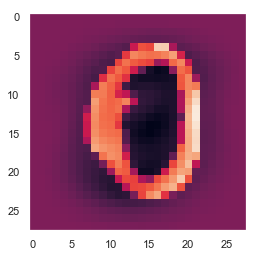

In [42]:
import matplotlib.pyplot as plt
first_array = test_x_copy[0].reshape(28,28)  #绘图前，变形到二维空间
plt.imshow(first_array)
# plt.grid(False)
plt.show()

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)   #降维，除燥
pca.fit(train_x)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

## 使用高斯贝努力模型计算似然概率

In [44]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x, train_y);

In [45]:
pred_y = model.predict(test_x)


In [46]:
score = model.score(test_x,test_y)

In [47]:
score

0.4571

## 使用 Bernoulli Naive Bayes

In [48]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB()
model2.fit(train_x, train_y)
score = model2.score(test_x,test_y)

In [49]:
score

0.7516

# 非监督学习——kmeans

## (1)导入必要的库

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  #用于指定绘图风格
import numpy as np

## （2）自己生成数据

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)[source]¶


X : array of shape [n_samples, n_features]

The generated samples.

y : array of shape [n_samples]

The integer labels for cluster membership of each sample.

In [2]:
from sklearn.datasets.samples_generator import make_blobs

#X为features，y_ture为label，此处用不上
X, y_ture = make_blobs(n_samples=300, centers = 4, cluster_std = 0.6, random_state = 0)

In [3]:
type(X)

numpy.ndarray

In [4]:
X.shape

(300, 2)

## （3）绘图：给我们观察的视角

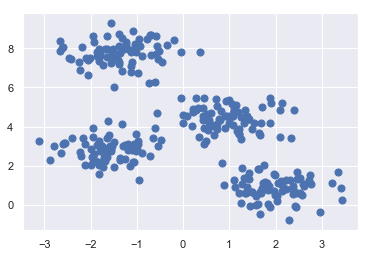

In [5]:
# %matplotlib qt
plt.scatter( X[:, 0],  X[:, 1], s = 50)
plt.show()

## （4）用Kmeans来找到簇

In [6]:
# 1）导入模型
from sklearn.cluster import KMeans

#2)生成模型对象
kmeans = KMeans(n_clusters=4)
#3） 数据拟合（训练）
kmeans.fit(X)
#4）预测
y_means = kmeans.predict(X)

In [7]:
y_means

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

## (5)用可视化的方法，显示每个“类”的地盘

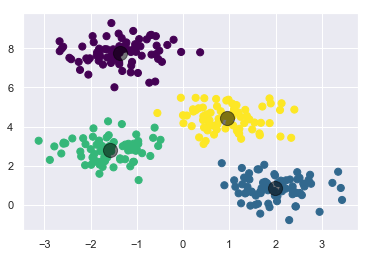

In [8]:
#用y_means簇别的不用，标识不同颜色
plt.scatter(X[:, 0], X[:, 1], c = y_means, s = 50, cmap ='viridis')

#画出簇中心点

centers = kmeans.cluster_centers_

#alpha: The alpha blending value, between 0 (transparent) and 1 (opaque). 
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

plt.show()

In [9]:
#聚类的效果：找到簇中心
print(kmeans.cluster_centers_)

[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


## （6） 划分势力范围

In [10]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

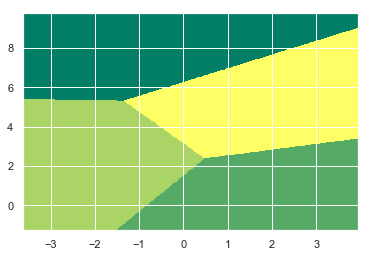

In [11]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
#interpolation 差值运算. cm:colormap
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.summer,
           aspect = 'auto', origin = 'lower')

## 汇合代码

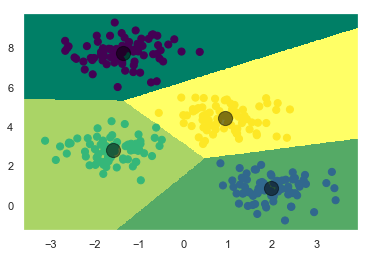

In [14]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
#interpolation 差值运算
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.summer,
           aspect = 'auto', origin = 'lower')


#用y_means簇别的不用，标识不同颜色
plt.scatter(X[:, 0], X[:, 1], c = y_means, s = 50, cmap ='viridis')

#画出簇中心点

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
# plt.grid(axis="y")
# plt.grid(False)
plt.show()